In [15]:
import pandas as pd
import numpy as np


datos_ext='base_ini_externa.txt'
datos_int='base_ini_interna.csv'
datos_pt1='base_ini_parte1.csv'
datos_comp3='base_comportamiento_3.csv'
datos_comp2='base_comportamiento_2.txt'
datos_inicio='bd_inicio_parte1.txt'
datos_inv='base_inversion.txt'

b_comp3=pd.read_csv(datos_comp3)
b_comp2=pd.read_csv(datos_comp2,delimiter=' ')
b_inicio=pd.read_csv(datos_inicio,delimiter=' ')
b_int=pd.read_csv(datos_int)
b_ext=pd.read_csv(datos_ext,delimiter=' ')
b_pt1=pd.read_csv(datos_pt1)
b_inv=pd.read_csv(datos_inv,delimiter=' ')


#print(b_comp3.head(2))
#print(b_comp2.head(2))
#print(b_inicio.head(2),'\n',b_int.head(2),'\n',b_ext.head(2),'\n',b_pt1.head(2),'\n',b_inv.head(2))


unir las bases de las variables

In [16]:
merge_t = b_inicio.merge( b_int, on="_id_").merge(b_ext, on='_id_').merge(b_pt1, on='_id_').merge(b_inv,on='_id2_') #unimos las bases
merge_t['num_caso']=merge_t['_id_']  
merge_t=merge_t.set_index('num_caso') #agregamos los id como indices
#merge_t=merge_t.dropna()
merge_t=merge_t.sort_values(by=['_id_'])   #ordenamos por inidces

merge_t.head(2)

,_id_,comp_interno4_x,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4_y,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,_id2_,comp_mixto1,inversion
num_caso,,,,,,,,,,,,,,,,,
1,1,67.0,2016-03-31,3039.513678,b'1',26.0,67.0,3.0,3.0,171.0,217.391304,21.545533,102.0,-230.0,23,0.3800,52.50049
7,7,75.0,2016-01-19,1547.112462,b'1',28.0,75.0,1.0,11.0,173.0,468.115942,21.674806,108.0,-230.0,161,0.3336,0.04748


In [73]:
comportamiento=pd.merge(b_comp3,b_comp2, how='outer', left_index=True, right_index=True)  #unimos las bases de comportamiento
comportamiento=comportamiento.drop(['mes_informacion_y'], axis=1)     #eliminamos las columnas repetidas
comportamiento=comportamiento.rename(columns={"num_caso_x": "_id_",'num_caso_y':'num_caso'})  #renombramos


In [74]:
comportamiento.head()

,_id_,mes_informacion_x,comportamiento_j,num_caso,Tiempo_aparicion
0,1,2016-04-01 00:00:00,0.0,1,0.0
1,1,2016-05-01 00:00:00,0.0,1,1.0
2,1,2016-06-01 00:00:00,0.0,1,2.0
3,1,2016-07-01 00:00:00,0.0,1,3.0
4,1,2016-08-01 00:00:00,0.0,1,4.0


In [110]:
comp=comportamiento.groupby(['num_caso']) #agrupar el comportamiento por num caso
#hacemos un data frame que contenga el numero de atrasos entre e
pr=pd.DataFrame({'comp':comp['comportamiento_j'].sum()/comp['Tiempo_aparicion'].sum()})
pr['_id_']=pr.index #agregamos la columna _id_ para cruzarla con las demas tablas
pr.head()

,comp,_id_
num_caso,,
1,0.003702,1
7,0.059113,7
8,0.002992,8
9,0.000000,9
10,0.008333,10


In [116]:
len(pr.loc[pr['comp']>=0.8])

45

In [118]:
ma=pr['comp'].max() #la persona que se atrasó por mas tiempo
ma

1.0

In [119]:
pr=pr.sort_values(by=['_id_'])#ordenar por id
pr['_id_']=pr['_id_'].astype(int)
pr.tail()

,comp,_id_
num_caso,,
98987,0.0,98987
98988,0.0,98988
98990,0.0,98990
98992,0.0,98992
98997,0.0,98997


In [120]:
print(len(merge_t['_id_']),len(comportamiento['num_caso']),len(pr['_id_']))

17536 1455536 49352


In [121]:
#pr['prom_norm']=1-pr['comportamiento_j']**2/ma**2  #normalizamos y ordenamos promedio de atrasos en el pago por tiempo determinado tiempo
pr['pr_bin']=pr['comp']                   #copiamos la columna
pr.loc[pr['comp']>=0.8,'pr_bin']=0    # Le asignamos 0 o 1 según su pormedio de atraso normalizado
pr.loc[pr['comp']<0.8,'pr_bin']=1

In [122]:
tab=merge_t.merge(pr,on='_id_', how="right")   #unimos promedio de atraso y las variales

In [123]:
tab.head()

,_id_,comp_interno4_x,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4_y,categoria1,categoria2,categoria3,comp_externo1,comp_externo2,comp_externo3,comp_externo4,_id2_,comp_mixto1,inversion,comp,pr_bin
0,1,67.0,2016-03-31,3039.513678,b'1',26.0,67.0,3.0,3.0,171.0,217.391304,21.545533,102.0,-230.0,23.0,0.38000,52.500490,0.003702,1.0
1,7,75.0,2016-01-19,1547.112462,b'1',28.0,75.0,1.0,11.0,173.0,468.115942,21.674806,108.0,-230.0,161.0,0.33360,0.047480,0.059113,1.0
2,8,55.0,2016-02-10,1215.805471,b'1',14.0,55.0,2.0,6.0,159.0,371.884058,36.857225,125.0,-230.0,184.0,0.27898,227.537211,0.002992,1.0
3,9,55.0,2016-02-18,0.000000,b'1',11.0,55.0,2.0,9.0,156.0,85.507246,6.274059,105.0,-230.0,207.0,0.38000,0.921995,0.000000,1.0
4,10,56.0,2016-02-18,0.000000,b'1',11.0,56.0,2.0,6.0,156.0,72.463768,7.181844,92.0,-230.0,230.0,0.37050,39.259568,0.008333,1.0


No handles with labels found to put in legend.


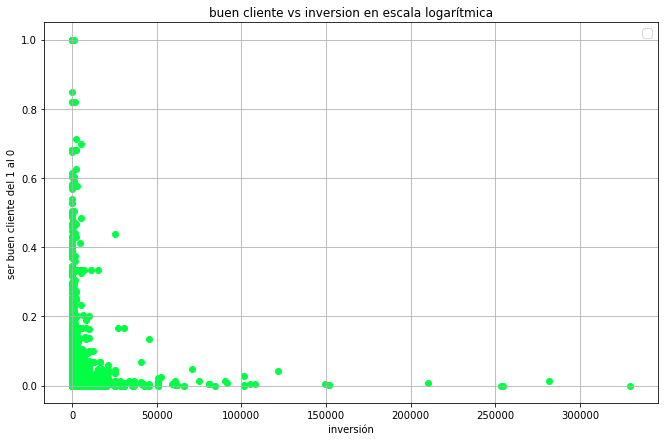

In [128]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize=[11, 7])
plt.title('buen cliente vs componente')
plt.xlabel('componente')
plt.ylabel('ser buen cliente del 1 al 0')
ax.scatter(tab['comp_interno1'],tab['comp'],color='#00ff44')
#plt.axvline(x=60, linestyle = '--')
#ax.plot([1,3,5,2],[1,3,5,2],color='#00ff44')
plt.grid()
#plt.xscale('log')
ax.legend(loc='upper right',fontsize=12)
plt.show()